## Python - Predicting wine type and quality
#### Using machine learning algorithms to predict wine type (red or white) and quality


#### Summary

1. Dataset
2. Problem
3. Data loading and preprocessing
4. Exploratory data analysis and visualization
5. Feature engineering\
    5.1 Wine quality\
    5.2 Wine type
6. Model selection and training\
    6.1. Wine quality\
    6.2. Wine type

#### Dataset

The datasets are available at:

- white wine = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
- red wine = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

#### Problem

The main goal of this study is to obtain predictive models able to classify wines according to type and quality.
- Type has two levels - Red or White
- Quality varies from 0 to 10

#### Data loading and preprocessing

In [181]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [2]:
df_white = pd.read_csv(
    "C:/Users/Gustavo/OneDrive/Data_Science/wine_quality/winequality-white.csv", sep=";")
df_red = pd.read_csv(
    "C:/Users/Gustavo/OneDrive/Data_Science/wine_quality/winequality-red.csv")

In [3]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# add columns with labels for each wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
# check shapes
df_red.shape, df_white.shape

((1599, 13), (4898, 13))

In [9]:
# join the two dataframes
df_wine_full = pd.concat([df_red, df_white], axis=0)

In [10]:
# check shape again
df_wine_full.shape

(6497, 13)

In [11]:
# remove spaces from column names
df_wine_full.columns = df_wine_full.columns.str.replace(' ', '_')

In [12]:
# check column names
df_wine_full.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### 4. Exploratory data analysis and visualization

In [13]:
# describe the dataset
df_wine_full.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
# check for NAs
df_wine_full.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

The dataset have two columns with labels (quality and type) which will be used to classify the wines, therefore, it is important to see the distribution of the data among these labels

In [15]:
df_wine_full.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [16]:
# change type format to be considered as differente classes and not numbers
df_wine_full['quality'] = df_wine_full['quality'].astype('category')

<AxesSubplot:xlabel='type', ylabel='count'>

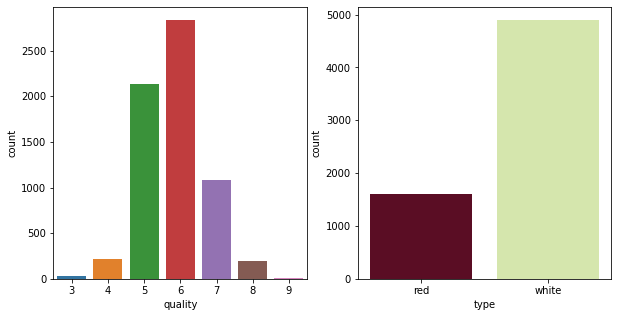

In [17]:
# plot quality levels
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df_wine_full, x='quality', ax=axes[0])
sns.countplot(data=df_wine_full, x='type',
              ax=axes[1], palette=['#67001f', "#d9f0a3"])

We can see that the classes are very unbalanced for the two parameters, quality and type. Unbalanced classes may result in biased predictions, so it's important to evaluate how this unbalancing may affect the predictions. There are many approaches to lead with unbalanced classes when applying classification models, such as under and oversampling methods, and use of different weights for the classes in the models. Here, I will be using the approach of setting weights for each class in the ML model.

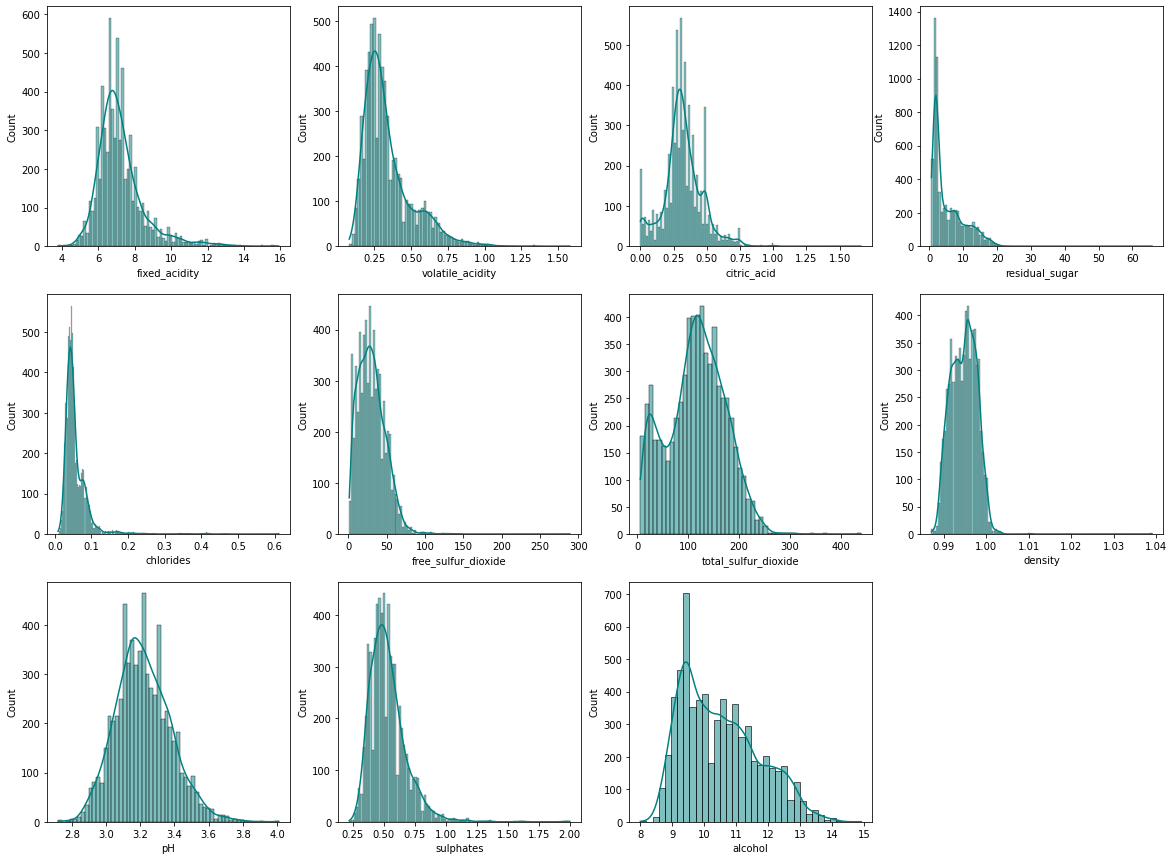

In [18]:
# Plot histogram to understand the distribution

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

sns.histplot(data=df_wine_full, x="fixed_acidity",
             kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df_wine_full, x="volatile_acidity",
             kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df_wine_full, x="citric_acid",
             kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df_wine_full, x="residual_sugar",
             kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=df_wine_full, x="chlorides",
             kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df_wine_full, x="free_sulfur_dioxide",
             kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_wine_full, x="total_sulfur_dioxide",
             kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df_wine_full, x="density",
             kde=True, color="teal", ax=axs[1, 3])
sns.histplot(data=df_wine_full, x="pH", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df_wine_full, x="sulphates",
             kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df_wine_full, x="alcohol",
             kde=True, color="teal", ax=axs[2, 2])

fig.delaxes(axs[2, 3])

<AxesSubplot:>

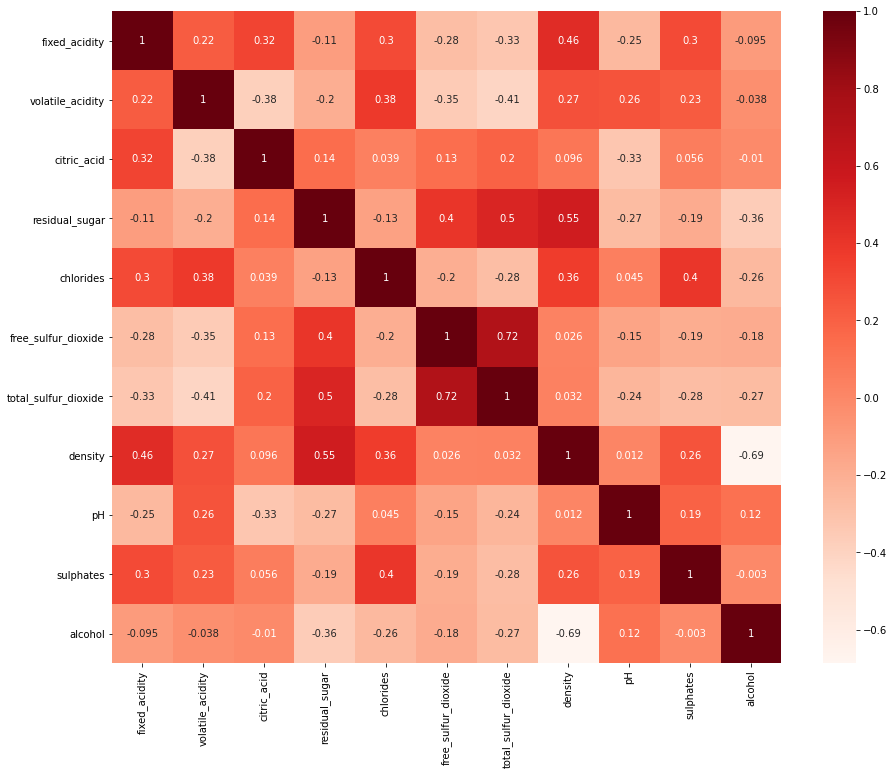

In [19]:
# check correlations between variables
corr_wine = df_wine_full.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_wine, annot=True, cmap=plt.cm.Reds)

Total sulfur dioxide and free sulfur dioxide are positively correlated which means that it can be difficult to separate their effects on the response variable. This situation may require some additional knowledge on the chemical function of the sulfur dioxide on wine characteristics.

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='total_sulfur_dioxide'>

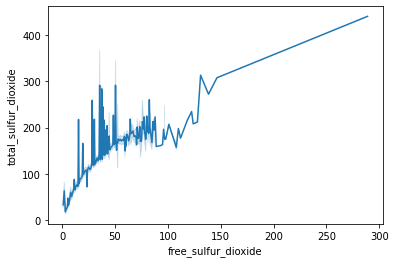

In [20]:
# plot to chech the correlation of sulfur dioxide types
sns.lineplot(x="free_sulfur_dioxide",
             y="total_sulfur_dioxide", data=df_wine_full)

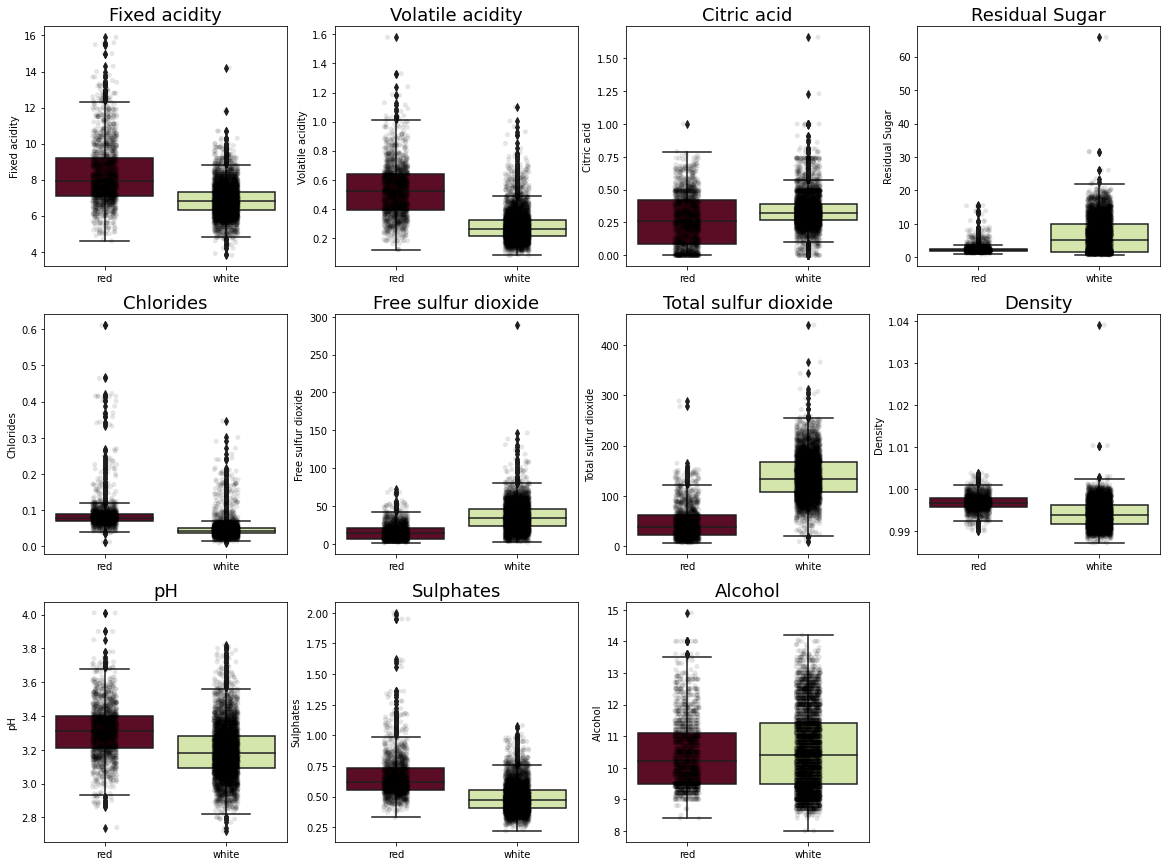

In [21]:
# visualize the relationship between each attribute and wine type

f, axes = plt.subplots(3, 4, figsize=(20, 15))

# fixed acidity
sns.boxplot(x='type', y='fixed_acidity', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 0])
sns.stripplot(x='type', y='fixed_acidity', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 0])
axes[0, 0].set_title("Fixed acidity", fontsize=18)
axes[0, 0].set_ylabel("Fixed acidity")
axes[0, 0].set_xlabel("")

# volatile acidity
sns.boxplot(x='type', y='volatile_acidity', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 1])
sns.stripplot(x='type', y='volatile_acidity', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 1])
axes[0, 1].set_title("Volatile acidity", fontsize=18)
axes[0, 1].set_ylabel("Volatile acidity")
axes[0, 1].set_xlabel("")

# citric acid
sns.boxplot(x='type', y='citric_acid', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 2])
sns.stripplot(x='type', y='citric_acid', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 2])
axes[0, 2].set_title("Citric acid", fontsize=18)
axes[0, 2].set_ylabel("Citric acid")
axes[0, 2].set_xlabel("")

# residual sugar
sns.boxplot(x='type', y='residual_sugar', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 3])
sns.stripplot(x='type', y='residual_sugar', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 3])
axes[0, 3].set_title("Residual Sugar", fontsize=18)
axes[0, 3].set_ylabel("Residual Sugar")
axes[0, 3].set_xlabel("")

# chlorides
sns.boxplot(x='type', y='chlorides', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 0])
sns.stripplot(x='type', y='chlorides', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 0])
axes[1, 0].set_title("Chlorides", fontsize=18)
axes[1, 0].set_ylabel("Chlorides")
axes[1, 0].set_xlabel("")

# free sulfur dioxide
sns.boxplot(x='type', y='free_sulfur_dioxide', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 1])
sns.stripplot(x='type', y='free_sulfur_dioxide', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 1])
axes[1, 1].set_title("Free sulfur dioxide", fontsize=18)
axes[1, 1].set_ylabel("Free sulfur dioxide")
axes[1, 1].set_xlabel("")

# total sulfur dioxide
sns.boxplot(x='type', y='total_sulfur_dioxide', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 2])
sns.stripplot(x='type', y='total_sulfur_dioxide', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 2])
axes[1, 2].set_title("Total sulfur dioxide", fontsize=18)
axes[1, 2].set_ylabel("Total sulfur dioxide")
axes[1, 2].set_xlabel("")

# density
sns.boxplot(x='type', y='density', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 3])
sns.stripplot(x='type', y='density', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 3])
axes[1, 3].set_title("Density", fontsize=18)
axes[1, 3].set_ylabel("Density")
axes[1, 3].set_xlabel("")

# ph
sns.boxplot(x='type', y='pH', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 0])
sns.stripplot(x='type', y='pH', color='black', alpha=0.1,
              data=df_wine_full, ax=axes[2, 0])
axes[2, 0].set_title("pH", fontsize=18)
axes[2, 0].set_ylabel("pH")
axes[2, 0].set_xlabel("")

# sulphates
sns.boxplot(x='type', y='sulphates', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 1])
sns.stripplot(x='type', y='sulphates', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[2, 1])
axes[2, 1].set_title("Sulphates", fontsize=18)
axes[2, 1].set_ylabel("Sulphates")
axes[2, 1].set_xlabel("")

# alcohol
sns.boxplot(x='type', y='alcohol', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 2])
sns.stripplot(x='type', y='alcohol', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[2, 2])
axes[2, 2].set_title("Alcohol", fontsize=18)
axes[2, 2].set_ylabel("Alcohol")
axes[2, 2].set_xlabel("")

f.delaxes(axes[2, 3])

There are some clearly differences between red and white types for some of the wine charachteristics (e.g., volatile acidity and total sulfur dioxide). Alcohol and citric acid seems to not differ (comparing the medians) between wine types - maybe these two features could be removed from the analysis, but it is better to check through a statistical test. The total sulfur dioxide shows to be a better predictor of wine types than the free sulfur dioxide. As we observed in the correlation matrix they are higly correlated therefore I will consider only the the total sulfur for the analysis.

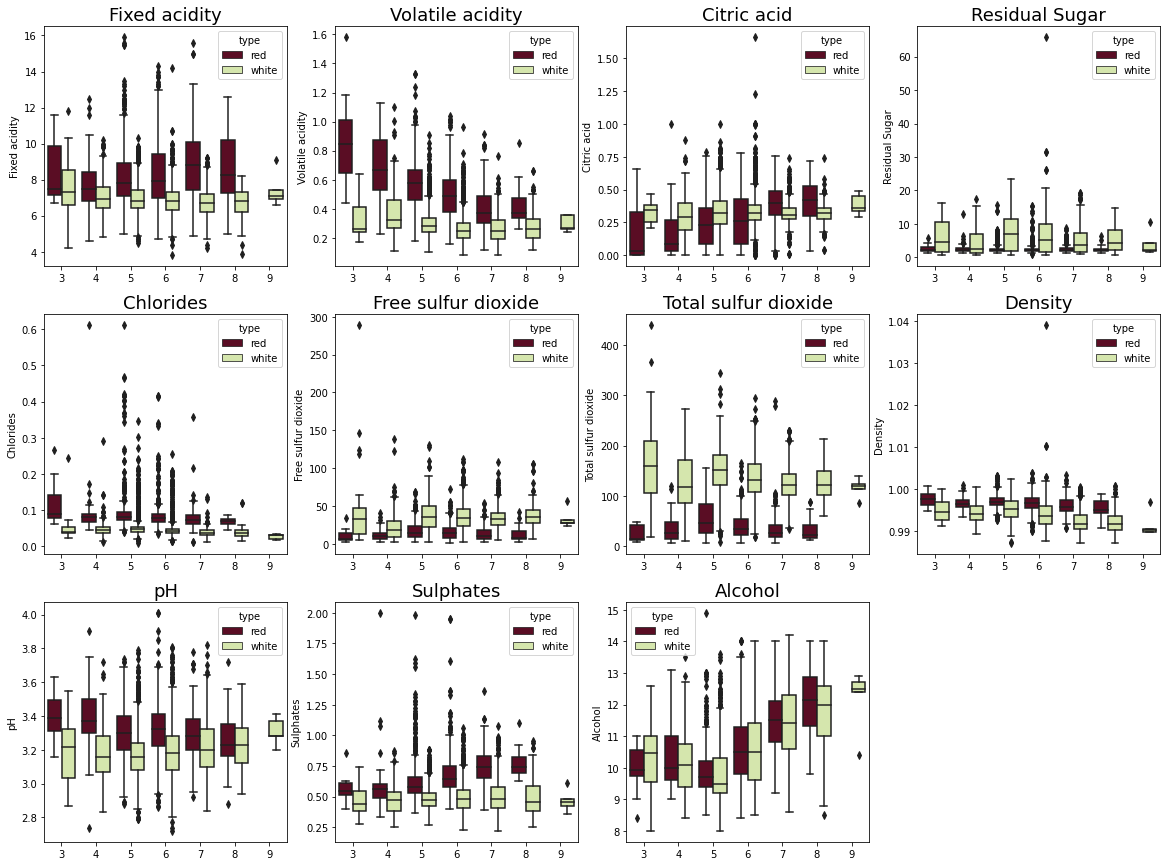

In [22]:
# visualize the relationship between each attribute and the quality index

f, axes = plt.subplots(3, 4, figsize = (20, 15))

# fixed acidity
sns.boxplot(x = 'quality', y = 'fixed_acidity', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 0])
axes[0, 0].set_title("Fixed acidity", fontsize = 18)
axes[0, 0].set_ylabel("Fixed acidity")
axes[0, 0].set_xlabel("")

# volatile acidity
sns.boxplot(x = 'quality', y = 'volatile_acidity', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 1])
axes[0, 1].set_title("Volatile acidity", fontsize = 18)
axes[0, 1].set_ylabel("Volatile acidity")
axes[0, 1].set_xlabel("")

# citric acid
sns.boxplot(x = 'quality', y = 'citric_acid', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 2])
axes[0, 2].set_title("Citric acid", fontsize = 18)
axes[0, 2].set_ylabel("Citric acid")
axes[0, 2].set_xlabel("")

# residual sugar
sns.boxplot(x = 'quality', y = 'residual_sugar', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 3])
axes[0, 3].set_title("Residual Sugar", fontsize = 18)
axes[0, 3].set_ylabel("Residual Sugar")
axes[0, 3].set_xlabel("")

# chlorides
sns.boxplot(x = 'quality', y = 'chlorides', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 0])
axes[1, 0].set_title("Chlorides", fontsize = 18)
axes[1, 0].set_ylabel("Chlorides")
axes[1, 0].set_xlabel("")

# free sulfur dioxide
sns.boxplot(x = 'quality', y = 'free_sulfur_dioxide', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 1])
axes[1, 1].set_title("Free sulfur dioxide", fontsize = 18)
axes[1, 1].set_ylabel("Free sulfur dioxide")
axes[1, 1].set_xlabel("")

# total sulfur dioxide 
sns.boxplot(x = 'quality', y = 'total_sulfur_dioxide', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 2])
axes[1, 2].set_title("Total sulfur dioxide", fontsize = 18)
axes[1, 2].set_ylabel("Total sulfur dioxide")
axes[1, 2].set_xlabel("")

# density 
sns.boxplot(x = 'quality', y = 'density', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 3])
axes[1, 3].set_title("Density", fontsize = 18)
axes[1, 3].set_ylabel("Density")
axes[1, 3].set_xlabel("")

# ph 
sns.boxplot(x = 'quality', y = 'pH', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 0])
axes[2, 0].set_title("pH", fontsize = 18)
axes[2, 0].set_ylabel("pH")
axes[2, 0].set_xlabel("")

# sulphates 
sns.boxplot(x = 'quality', y = 'sulphates', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 1])
axes[2, 1].set_title("Sulphates", fontsize = 18)
axes[2, 1].set_ylabel("Sulphates")
axes[2, 1].set_xlabel("")

# alcohol 
sns.boxplot(x = 'quality', y = 'alcohol', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 2])
axes[2, 2].set_title("Alcohol", fontsize = 18)
axes[2, 2].set_ylabel("Alcohol")
axes[2, 2].set_xlabel("")

f.delaxes(axes[2,3])

- We can observe that as the alcohol content increases the quality index also increases.
- For red wines, the volatile acidity may be a good predictor of quality. Higher quality wines have lower volatile acidity values.

In [23]:
# New df removing the free sulfur dioxide
df_wine_full_2 = df_wine_full.drop('free_sulfur_dioxide', axis=1)

#### Outliers

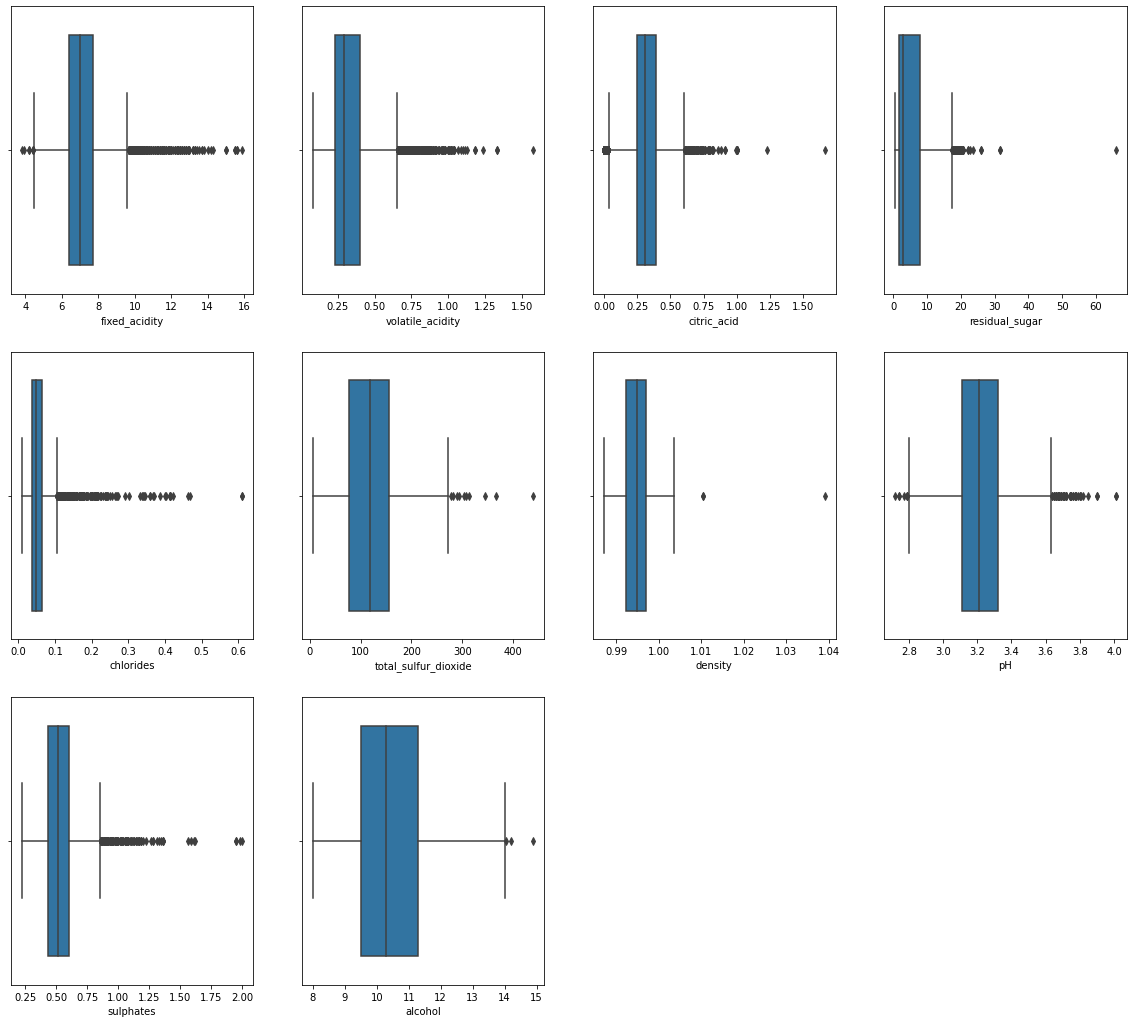

In [24]:
features = list(df_wine_full_2.columns.drop('quality'))

plt.figure(figsize=(20, 18))

for i in range(0, 10):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df_wine_full_2[features[i]])

Using the interquartile range method to detect and remove outliers from the dataset 

In [25]:
df_wine_full[features]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,white
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,white
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,white
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,white


In [26]:
ft_cols = ['fixed_acidity',
           'volatile_acidity',
           'citric_acid',
           'residual_sugar',
           'chlorides',
           'total_sulfur_dioxide',
           'density',
           'pH',
           'sulphates',
           'alcohol']

In [27]:
# function to remove outliers usinf the interquartile range method

def remove_outliers(df, ft_cols):
    
    # Calculate quantiles and IQR
    Q1 = df[ft_cols].quantile(0.25)
    Q3 = df[ft_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Identify the outliers in each feature column
    filter_outlier = ((df[ft_cols] < (
        Q1 - 1.5 * IQR)) | (df[ft_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Remove the outliers from the DataFrame
    df_new = df[~filter_outlier]

    return df_new

In [28]:
df_wine_new = remove_outliers(df_wine_full_2, ft_cols)

In [29]:
df_wine_new


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
6,7.9,0.60,0.06,1.6,0.069,59.0,0.99640,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,102.0,0.99780,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,65.0,0.99590,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,102.0,0.99780,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,103.0,0.99690,3.30,0.75,10.5,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,7,white


#### 5. Feature engineering

First, I will visualize the mutual information between each feature and the target variables. Mutual information measures the amount of information that a feature provides about the target variable. I will not remove or keep features based on this information but instead have a global view of the relationship between features and target variables.

In [201]:
# check mutual information (importance) of each feature for wine quality
X = df_wine_new.drop(['quality', 'type'], axis=1)
y = df_wine_new['quality']
importance = mutual_info_classif(X, y, random_state=42)
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,fixed_acidity,0.02
1,volatile_acidity,0.06
2,citric_acid,0.05
3,residual_sugar,0.06
4,chlorides,0.07
5,total_sulfur_dioxide,0.07
6,density,0.18
7,pH,0.03
8,sulphates,0.01
9,alcohol,0.16


<AxesSubplot:xlabel='importance', ylabel='features'>

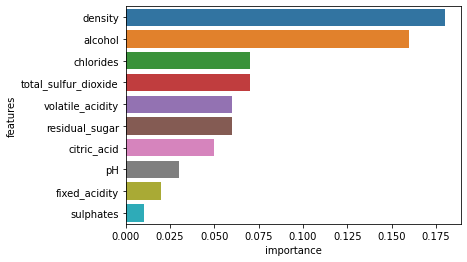

In [202]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

In [203]:
# check mutual information (importance) of each feature for wine type
X = df_wine_new.drop(['quality', 'type'], axis=1)
y = df_wine_new['type']
importance = mutual_info_classif(X, y, random_state=42)
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,fixed_acidity,0.06
1,volatile_acidity,0.15
2,citric_acid,0.04
3,residual_sugar,0.13
4,chlorides,0.26
5,total_sulfur_dioxide,0.23
6,density,0.10
7,pH,0.07
8,sulphates,0.09
9,alcohol,0.01


<AxesSubplot:xlabel='importance', ylabel='features'>

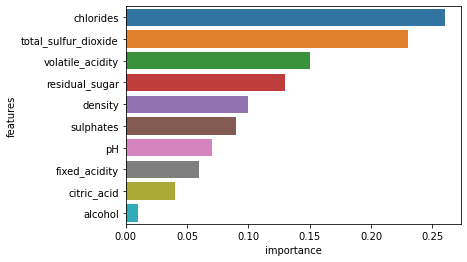

In [204]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

##### 5.1 Wine quality

In [30]:
X_quality = df_wine_new.drop(['quality', 'type'], axis=1)
y_quality = df_wine_new['quality'] 

In [31]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(X_quality, y_quality)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(X_quality.columns)):
    feature_scores[X_quality.columns[i]] = f_values[i],p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

alcohol: (236.34024623148267, 4.933398239903155e-267)
density: (112.57054641317208, 9.3149702424869e-134)
chlorides: (77.51237988544732, 5.490214646127078e-93)
volatile_acidity: (54.43438802213837, 2.2227098245861846e-65)
total_sulfur_dioxide: (11.132130290653562, 2.2510526434389614e-12)
fixed_acidity: (9.500671643497935, 2.0931438890145572e-10)
residual_sugar: (6.356447543151438, 1.1178851875019632e-06)
citric_acid: (6.28959681417822, 1.3372575224155672e-06)
sulphates: (4.202334775586493, 0.0003187376159167999)
pH: (1.779351763390546, 0.09915811743698247)


As we can see, the feature "pH" was not significant (p >= 0.05), that is, do not affect the quality score. Therefore, this feature can be removed from the quality analysis. 

##### 5.2 Wine type

In [32]:
X_type = df_wine_new.drop(['quality', 'type'], axis=1)
y_type = df_wine_new['type'] 

In [33]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(X_type, y_type)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(X_type.columns)):
    feature_scores[X_type.columns[i]] = f_values[i], p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

chlorides: (4823.89989801817, 0.0)
total_sulfur_dioxide: (2668.3210216824195, 0.0)
volatile_acidity: (2401.937300909364, 0.0)
sulphates: (986.7423384475275, 4.5244549815661415e-198)
fixed_acidity: (666.2011758889623, 3.939825231113982e-138)
pH: (638.66501350927, 7.970578393535224e-133)
density: (486.57264009926365, 4.841971926712576e-103)
residual_sugar: (421.31978261872047, 5.238682941858252e-90)
citric_acid: (163.72023602355173, 6.448902907228593e-37)
alcohol: (11.944613286659823, 0.0005525512828154931)


All features seems to significantly affect the wine type. Therefore, all will be considered in the analysis.

#### 6. Model selection and training

##### 6.1 Wine quality

In [218]:
X_quality = df_wine_new.drop(['quality', 'type', 'pH'], axis=1)
y_quality = df_wine_new['quality']

#encoder = LabelEncoder()
#y_encoded = encoder.fit_transform(y_quality) # xgboost requires the encoder

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_quality, y_quality, test_size=0.2, shuffle=True, random_state=123)


In [219]:
unique_elements, counts = np.unique(y_quality, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Score', f"{element}: {count}")

Score 3: 13
Score 4: 139
Score 5: 1531
Score 6: 2288
Score 7: 928
Score 8: 170
Score 9: 5


In [220]:
unique_elements, counts = np.unique(y_train, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Score', f"{element}: {count}")

Score 3: 9
Score 4: 115
Score 5: 1234
Score 6: 1856
Score 7: 709
Score 8: 133
Score 9: 3


In [221]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Score', f"{element}: {count}")

Score 3: 4
Score 4: 24
Score 5: 297
Score 6: 432
Score 7: 219
Score 8: 37
Score 9: 2


In [222]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
classifiers = [
    LogisticRegression(class_weight='balanced', random_state=0),
    DecisionTreeClassifier(class_weight='balanced', random_state=0),
    RandomForestClassifier(class_weight='balanced', random_state=0),
    KNeighborsClassifier()
    #XGBClassifier(booster='gbtree', tree_method = 'gpu_hist', random_state=0)
]

In [224]:
# Fit the classifiers on the training data and evaluate on the testing data
best_models = {}
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Model:', f"{clf.__class__.__name__},", 'Accuracy:', f"{acc},", 'Recall:', f"{rec},", 'Precision:', f"{prec},", 'F1-score:', f"{f1}")
    
    # Use GridSearchCV to find the best hyperparameters for each classifier
    if clf.__class__.__name__ == 'LogisticRegression':
        params = {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10]
        }
        clf_lr = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_lr.fit(X_train, y_train)
        y_pred = clf_lr.predict(X_test)
        acc_lr = accuracy_score(y_test, y_pred)
        rec_lr = recall_score(y_test, y_pred, average='weighted')
        prec_lr = precision_score(y_test, y_pred, average='weighted')
        f1_lr = f1_score(y_test, y_pred, average='weighted')
        best_models['LR'] = (clf_lr.best_estimator_, acc_lr, rec_lr, prec_lr, f1_lr)

    elif clf.__class__.__name__ == 'DecisionTreeClassifier':
        params = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
        clf_dt = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_dt.fit(X_train, y_train)
        y_pred = clf_dt.predict(X_test)
        acc_dt = accuracy_score(y_test, y_pred)
        rec_dt = recall_score(y_test, y_pred, average='weighted')
        prec_dt = precision_score(y_test, y_pred, average='weighted')
        f1_dt = f1_score(y_test, y_pred, average='weighted')
        best_models['DT'] = (clf_dt.best_estimator_, acc_dt, rec_dt, prec_dt, f1_dt)

    elif clf.__class__.__name__ == 'RandomForestClassifier':
        params = {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [30, 60, 90, 120],
            'min_samples_leaf': [2, 5, 10],
            'min_samples_split': [15, 20, 25]
        }
        clf_rf = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_rf.fit(X_train, y_train)
        y_pred = clf_rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_pred)
        rec_rf = recall_score(y_test, y_pred, average='weighted')
        prec_rf = precision_score(y_test, y_pred, average='weighted')
        f1_rf = f1_score(y_test, y_pred, average='weighted')
        best_models['RF'] = (clf_rf.best_estimator_, acc_rf, rec_rf, prec_rf, f1_rf)

    elif clf.__class__.__name__ == 'KNeighborsClassifier':
        params = {
        'n_neighbors': list(range(1, 30)),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'kd_tree']
        }
        clf_knn = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_knn.fit(X_train, y_train)
        y_pred = clf_knn.predict(X_test)
        acc_knn = accuracy_score(y_test, y_pred)
        rec_knn = recall_score(y_test, y_pred, average='weighted')
        prec_knn = precision_score(y_test, y_pred, average='weighted')
        f1_knn = f1_score(y_test, y_pred, average='weighted')
        best_models['KNN'] = (clf_knn.best_estimator_, acc_knn, rec_knn, prec_knn, f1_knn)

    # elif clf.__class__.__name__ == 'XGBClassifier':
    #     params = {
    #     'learning_rate': [0.1, 0.2, 0.3],
    #     'max_depth': [0, 2, 4, 6, 8],
    #     'gamma': [0, 0.5, 1],
    #     'scale_pos_weight': [1, 2, 3, 4, 5],
    #     'max_leaves': [0, 2, 4, 6],
    #     'objective': ['multi:softprob', 'multi:softmax']
    #     }
    #     clf_xgb = GridSearchCV(clf, params)
    #     clf_xgb.fit(X_train, y_train)
    #     y_pred = clf_xgb.predict(X_test)
    #     acc_xgb = accuracy_score(y_test, y_pred)
    #     best_models['XGB'] = (clf_xgb.best_estimator_, acc_xgb)

Model: LogisticRegression, Accuracy: 0.3142857142857143, Recall: 0.3142857142857143, Precision: 0.4775809507477841, F1-score: 0.36056676167539
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Model: DecisionTreeClassifier, Accuracy: 0.6, Recall: 0.6, Precision: 0.6046360098488028, F1-score: 0.6012189181459514
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Model: RandomForestClassifier, Accuracy: 0.677832512315271, Recall: 0.677832512315271, Precision: 0.7049178902940867, F1-score: 0.6648610038132363
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Model: KNeighborsClassifier, Accuracy: 0.5428571428571428, Recall: 0.5428571428571428, Precision: 0.5337421772047711, F1-score: 0.5278717969677367
Fitting 10 folds for each of 116 candidates, totalling 1160 fits


In [225]:
for clf, (model, acc, rec, prec, f1) in best_models.items():
    print(clf, model, acc, rec, prec, f1)

LR LogisticRegression(C=10, class_weight='balanced', random_state=0) 0.31133004926108376 0.31133004926108376 0.4735520766125699 0.3572413158982533
DT DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0) 0.5812807881773399 0.5812807881773399 0.5821985543196383 0.5814310809580652
RF RandomForestClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=2, min_samples_split=15,
                       random_state=0) 0.6285714285714286 0.6285714285714286 0.6248812777229933 0.6255685952563016
KNN KNeighborsClassifier(n_neighbors=27, weights='distance') 0.6581280788177339 0.6581280788177339 0.6826293328086434 0.6456467619687776


In [226]:
lr_best = best_models['LR'][0]
pred = lr_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.05      0.21      0.08        24
           5       0.53      0.44      0.48       297
           6       0.54      0.23      0.32       432
           7       0.39      0.28      0.32       219
           8       0.11      0.49      0.18        37
           9       0.00      0.00      0.00         2

    accuracy                           0.31      1015
   macro avg       0.23      0.24      0.20      1015
weighted avg       0.47      0.31      0.36      1015



In [227]:
dt_best = best_models['DT'][0]
pred = dt_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.19      0.25      0.21        24
           5       0.61      0.58      0.60       297
           6       0.62      0.64      0.63       432
           7       0.56      0.54      0.55       219
           8       0.45      0.49      0.47        37
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1015
   macro avg       0.35      0.36      0.35      1015
weighted avg       0.58      0.58      0.58      1015



In [228]:
rf_best = best_models['RF'][0]
pred = rf_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.47      0.33      0.39        24
           5       0.66      0.66      0.66       297
           6       0.63      0.62      0.62       432
           7       0.60      0.68      0.64       219
           8       0.59      0.46      0.52        37
           9       0.00      0.00      0.00         2

    accuracy                           0.63      1015
   macro avg       0.42      0.39      0.40      1015
weighted avg       0.62      0.63      0.63      1015



In [229]:
knn_best = best_models['KNN'][0]
pred = knn_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.04      0.08        24
           5       0.71      0.65      0.68       297
           6       0.60      0.80      0.69       432
           7       0.73      0.53      0.61       219
           8       1.00      0.41      0.58        37
           9       0.00      0.00      0.00         2

    accuracy                           0.66      1015
   macro avg       0.58      0.35      0.38      1015
weighted avg       0.68      0.66      0.65      1015



##### Feature importance for the Random Forest model

In [230]:
# feature importance
importance = rf_best.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10763
Feature: 1, Score: 0.09039
Feature: 2, Score: 0.09231
Feature: 3, Score: 0.11618
Feature: 4, Score: 0.11459
Feature: 5, Score: 0.10231
Feature: 6, Score: 0.14318
Feature: 7, Score: 0.07588
Feature: 8, Score: 0.15752


In [231]:
ft_cols_quality = ['fixed_acidity',
           'volatile_acidity',
           'citric_acid',
           'residual_sugar',
           'chlorides',
           'total_sulfur_dioxide',
           'density',
           'sulphates',
           'alcohol']

In [232]:
df_importance = pd.DataFrame({'features': ft_cols_quality, 'importance': importance})
df_importance

,features,importance
0,fixed_acidity,0.107634
1,volatile_acidity,0.090392
2,citric_acid,0.092312
3,residual_sugar,0.116181
4,chlorides,0.114587
5,total_sulfur_dioxide,0.102307
6,density,0.143185
7,sulphates,0.075877
8,alcohol,0.157525


<AxesSubplot:xlabel='importance', ylabel='features'>

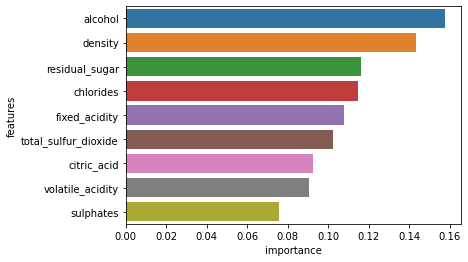

In [233]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

##### 6.2 Wine type

In [234]:
X_type = df_wine_new.drop(['quality', 'type'], axis=1)
y_type = df_wine_new['type']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_type, y_type, test_size=0.2, shuffle=True, random_state=123)

In [235]:
unique_elements, counts = np.unique(y_type, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Type', f"{element}: {count}")

Type red: 688
Type white: 4386


In [236]:
unique_elements, counts = np.unique(y_train, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Type', f"{element}: {count}")

Type red: 556
Type white: 3503


In [237]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print('Type', f"{element}: {count}")

Type red: 132
Type white: 883


In [238]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [239]:
classifiers = [
    LogisticRegression(class_weight='balanced', random_state=0),
    DecisionTreeClassifier(class_weight='balanced', random_state=0),
    RandomForestClassifier(class_weight='balanced', random_state=0),
    KNeighborsClassifier()
    #XGBClassifier(booster='gbtree', tree_method = 'gpu_hist', random_state=0)
]

In [240]:
# Fit the classifiers on the training data and evaluate on the testing data
best_models = {}
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Model:', f"{clf.__class__.__name__},", 'Accuracy:', f"{acc},", 'Recall:', f"{rec},", 'Precision:', f"{prec},", 'F1-score:', f"{f1}")
    
    # Use GridSearchCV to find the best hyperparameters for each classifier
    if clf.__class__.__name__ == 'LogisticRegression':
        params = {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10]
        }
        clf_lr = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_lr.fit(X_train, y_train)
        y_pred = clf_lr.predict(X_test)
        acc_lr = accuracy_score(y_test, y_pred)
        rec_lr = recall_score(y_test, y_pred, average='weighted')
        prec_lr = precision_score(y_test, y_pred, average='weighted')
        f1_lr = f1_score(y_test, y_pred, average='weighted')
        best_models['LR'] = (clf_lr.best_estimator_, acc_lr, rec_lr, prec_lr, f1_lr)

    elif clf.__class__.__name__ == 'DecisionTreeClassifier':
        params = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
        clf_dt = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_dt.fit(X_train, y_train)
        y_pred = clf_dt.predict(X_test)
        acc_dt = accuracy_score(y_test, y_pred)
        rec_dt = recall_score(y_test, y_pred, average='weighted')
        prec_dt = precision_score(y_test, y_pred, average='weighted')
        f1_dt = f1_score(y_test, y_pred, average='weighted')
        best_models['DT'] = (clf_dt.best_estimator_, acc_dt, rec_dt, prec_dt, f1_dt)

    elif clf.__class__.__name__ == 'RandomForestClassifier':
        params = {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [30, 60, 90, 120],
            'min_samples_leaf': [2, 5, 10],
            'min_samples_split': [15, 20, 25]
        }
        clf_rf = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_rf.fit(X_train, y_train)
        y_pred = clf_rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_pred)
        rec_rf = recall_score(y_test, y_pred, average='weighted')
        prec_rf = precision_score(y_test, y_pred, average='weighted')
        f1_rf = f1_score(y_test, y_pred, average='weighted')
        best_models['RF'] = (clf_rf.best_estimator_, acc_rf, rec_rf, prec_rf, f1_rf)

    elif clf.__class__.__name__ == 'KNeighborsClassifier':
        params = {
        'n_neighbors': list(range(1, 30)),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'kd_tree']
        }
        clf_knn = GridSearchCV(clf, params, cv=10, n_jobs=-1, verbose=10)
        clf_knn.fit(X_train, y_train)
        y_pred = clf_knn.predict(X_test)
        acc_knn = accuracy_score(y_test, y_pred)
        rec_knn = recall_score(y_test, y_pred, average='weighted')
        prec_knn = precision_score(y_test, y_pred, average='weighted')
        f1_knn = f1_score(y_test, y_pred, average='weighted')
        best_models['KNN'] = (clf_knn.best_estimator_, acc_knn, rec_knn, prec_knn, f1_knn)

    # elif clf.__class__.__name__ == 'XGBClassifier':
    #     params = {
    #     'learning_rate': [0.1, 0.2, 0.3],
    #     'max_depth': [0, 2, 4, 6, 8],
    #     'gamma': [0, 0.5, 1],
    #     'scale_pos_weight': [1, 2, 3, 4, 5],
    #     'max_leaves': [0, 2, 4, 6],
    #     'objective': ['multi:softprob', 'multi:softmax']
    #     }
    #     clf_xgb = GridSearchCV(clf, params)
    #     clf_xgb.fit(X_train, y_train)
    #     y_pred = clf_xgb.predict(X_test)
    #     acc_xgb = accuracy_score(y_test, y_pred)
    #     best_models['XGB'] = (clf_xgb.best_estimator_, acc_xgb)

Model: LogisticRegression, Accuracy: 0.9891625615763546, Recall: 0.9891625615763546, Precision: 0.989433385734443, F1-score: 0.9892478959173111
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Model: DecisionTreeClassifier, Accuracy: 0.9793103448275862, Recall: 0.9793103448275862, Precision: 0.9791441672202904, F1-score: 0.9792089822810471
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Model: RandomForestClassifier, Accuracy: 0.9911330049261083, Recall: 0.9911330049261083, Precision: 0.9912224701230423, F1-score: 0.9909990082482726
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Model: KNeighborsClassifier, Accuracy: 0.994088669950739, Recall: 0.994088669950739, Precision: 0.9940800964673083, F1-score: 0.9940498776501115
Fitting 10 folds for each of 116 candidates, totalling 1160 fits


In [241]:
for clf, (model, acc, rec, prec, f1) in best_models.items():
    print(clf, model, acc, rec, prec, f1)

LR LogisticRegression(C=1, class_weight='balanced', random_state=0) 0.9891625615763546 0.9891625615763546 0.989433385734443 0.9892478959173111
DT DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=0) 0.9783251231527094 0.9783251231527094 0.9783251231527094 0.9783251231527094
RF RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_leaf=2, min_samples_split=25,
                       n_estimators=50, random_state=0) 0.9921182266009853 0.9921182266009853 0.9920833078789966 0.9920665035334818
KNN KNeighborsClassifier(n_neighbors=4, weights='distance') 0.994088669950739 0.994088669950739 0.9940800964673083 0.9940498776501115


In [242]:
lr_best = best_models['LR'][0]
pred = lr_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         red       0.94      0.98      0.96       132
       white       1.00      0.99      0.99       883

    accuracy                           0.99      1015
   macro avg       0.97      0.98      0.98      1015
weighted avg       0.99      0.99      0.99      1015



In [243]:
dt_best = best_models['DT'][0]
pred = dt_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         red       0.92      0.92      0.92       132
       white       0.99      0.99      0.99       883

    accuracy                           0.98      1015
   macro avg       0.95      0.95      0.95      1015
weighted avg       0.98      0.98      0.98      1015



In [244]:
rf_best = best_models['RF'][0]
pred = rf_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         red       0.98      0.95      0.97       132
       white       0.99      1.00      1.00       883

    accuracy                           0.99      1015
   macro avg       0.99      0.98      0.98      1015
weighted avg       0.99      0.99      0.99      1015



In [245]:
knn_best = best_models['KNN'][0]
pred = knn_best.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         red       0.99      0.96      0.98       132
       white       0.99      1.00      1.00       883

    accuracy                           0.99      1015
   macro avg       0.99      0.98      0.99      1015
weighted avg       0.99      0.99      0.99      1015



##### Feature importance for the Random Forest model

In [246]:
# feature importance
importance = rf_best.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01603
Feature: 1, Score: 0.07516
Feature: 2, Score: 0.00548
Feature: 3, Score: 0.09695
Feature: 4, Score: 0.35595
Feature: 5, Score: 0.24433
Feature: 6, Score: 0.10753
Feature: 7, Score: 0.03357
Feature: 8, Score: 0.05322
Feature: 9, Score: 0.01177


In [247]:
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,fixed_acidity,0.02
1,volatile_acidity,0.08
2,citric_acid,0.01
3,residual_sugar,0.10
4,chlorides,0.36
5,total_sulfur_dioxide,0.24
6,density,0.11
7,pH,0.03
8,sulphates,0.05
9,alcohol,0.01


<AxesSubplot:xlabel='importance', ylabel='features'>

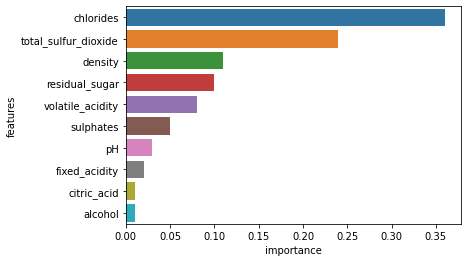

In [248]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')